<a href="https://colab.research.google.com/github/Srinivasragani/Sentiment-Analysis-using-ML-/blob/main/Copy_of_ML_MAJOR_OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
document= pd.read_table("/content/Restaurant_Reviews.csv")
document

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
document['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [ ]:
document.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
document.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
np.sum(document.isnull().any(axis=1))

0

In [ ]:
x=document['Review'].values
x

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.'

In [ ]:
y=document['Liked'].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [ ]:
document['Liked'].unique()

array([1, 0])

In [ ]:
document['Liked'].nunique()

2

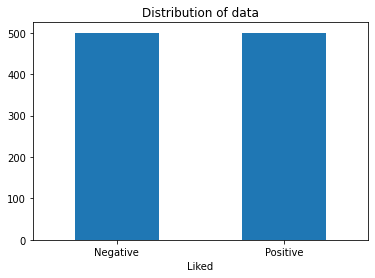

In [ ]:
ax=document.groupby('Liked').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
review,sentiment=list(document['Review']),list(document['Liked'])

In [ ]:
document['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

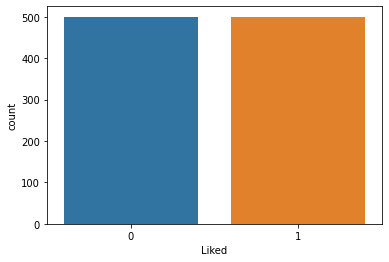

In [ ]:
sns.countplot(x='Liked',data=document)

 **METHOD 1: COUNT VECTORIZER AND SUPPORT VECTOR MACHINE**

**COUNT VECTORIZER**

In [ ]:
#count vectorizer - feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
op = vect.fit_transform(x).toarray()
op

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Printing the identified Unique words along with their indices
#print("Vocabulary: ", vect.vocabulary_)
  
# Encode the Document
#vector = vect.transform(x)
  
# Summarizing the Encoded Texts
#print("Encoded Document is:")
#print(vector.toarray())

In [ ]:
import pandas as pd
df = pd.DataFrame(op,columns = vect.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,17,1979,20,2007,23,30,30s,35,40,40min,45,4ths,5lb,70,85,90,99,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledged,actual,actually,added,affordable,afternoon,ago,ahead,...,winner,wire,wish,witnessed,won,wonderful,wontons,word,words,work,worker,workers,working,works,world,worries,worse,worst,worth,wouldn,wound,wow,wrap,wrapped,writing,wrong,ya,yama,yay,yeah,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail()

,00,10,100,11,12,15,17,1979,20,2007,23,30,30s,35,40,40min,45,4ths,5lb,70,85,90,99,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledged,actual,actually,added,affordable,afternoon,ago,ahead,...,winner,wire,wish,witnessed,won,wonderful,wontons,word,words,work,worker,workers,working,works,world,worries,worse,worst,worth,wouldn,wound,wow,wrap,wrapped,writing,wrong,ya,yama,yay,yeah,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,random_state =36)

In [ ]:
x.shape

(1000,)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
vect = CountVectorizer(stop_words = 'english')
x_train_vect = vect.fit_transform(x_train).toarray()
x_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_vect = vect.transform(x_test).toarray()
x_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

***SUPPORT VECTOR MACHINE***

In [ ]:
from sklearn.svm import SVC #support vector machine 
#SVC - support vector classifier 
#svc - similar to logistic regression 
#svc gives better accuracy model = SVC()
model=SVC()
model.fit(x_train_vect, y_train) 

SVC()

In [ ]:
y_train_pred = model.predict(x_train_vect)
print(y_train)
y_train_pred

[0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
y_pred = model.predict(x_test_vect)
print(y_test)
y_pred

[0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1
 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1])

**PERFORMANCE ANALYSYS**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.816

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.19332210998877664

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       132
           1       0.91      0.68      0.78       118

    accuracy                           0.82       250
   macro avg       0.84      0.81      0.81       250
weighted avg       0.83      0.82      0.81       250



In [ ]:
from sklearn import metrics
print("accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("precision: ", metrics.precision_score(y_test,y_pred)) 
print("recall: ", metrics.recall_score(y_test, y_pred))
print("f1: ", metrics.f1_score(y_test, y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))
train_preds = y_pred

accuracy:  0.816
precision:  0.9090909090909091
recall:  0.6779661016949152
f1:  0.7766990291262135
area under curve (auc):  0.8086800205444273


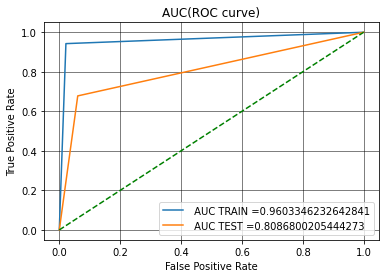

In [ ]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**DATA VISUALIZATION OF PREDICTED OUTPUT FOR ABOVE SVM MODEL**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


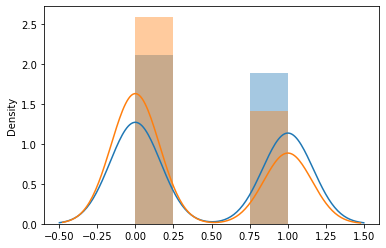

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_test)
sns.distplot(y_pred)

In [ ]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
245,0,0
246,1,1
247,1,1
248,0,0


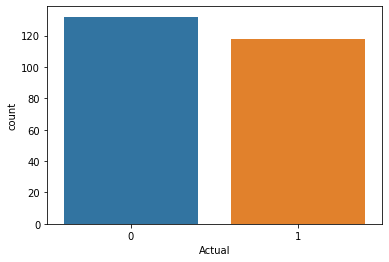

In [ ]:
sns.countplot(x='Actual',data=df)

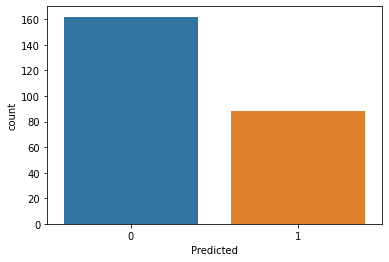

In [ ]:
sns.countplot(x='Predicted',data=df)

**METHOD 2: CREATING PIPELINE**

In [ ]:
#PIPELINE - SVC + count vectorizer 
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)
y_pred1 = text_model.predict(x_test)
y_pred1

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

**USING JOBLIB**

In [ ]:
import joblib
joblib.dump(text_model,'sentiment12')

['sentiment12']

In [ ]:
import joblib
text_model1 = joblib.load('sentiment12') #loads the saved model 

**Using the new model created using joblib,predicting the output of a new review**

In [ ]:
xq='Rude hostesses, pushy servers who leave you waiting. Bad, bad, bad I won’t be back,'
yq=text_model1.predict([xq])
if(yq==1):
  print('Liked :',yq)
else:
  print('Not Liked :',yq)

Not Liked : [0]


In [ ]:
xq='Absolutely amazing! The place is beautiful and staff are super friendly and the food is delicious.'
yq=text_model1.predict([xq])
if(yq==1):
  print('Liked :',yq)
else:
  print('Not Liked :',yq)

Liked : [1]


**DATA VISUALIZATION FOR PREDICTED OUTPUT OF MODEL 2(PIPELINE)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


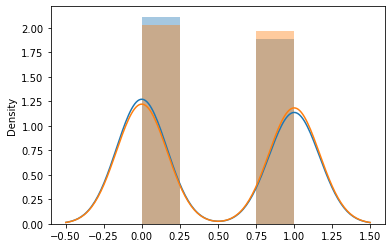

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_test)
sns.distplot(y_pred1)

In [ ]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
df1

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
245,0,0
246,1,1
247,1,0
248,0,0


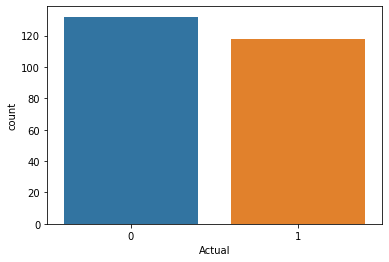

In [ ]:
sns.countplot(x='Actual',data=df1)

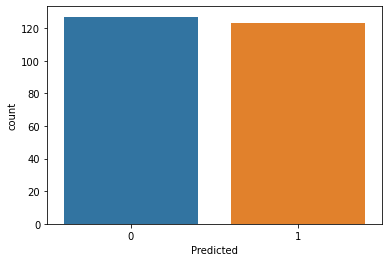

In [ ]:
sns.countplot(x='Predicted',data=df1)